In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [53]:
pd.options.display.max_rows = None

In [13]:
df = pd.read_csv("attacks_modificado_4.csv", index_col = 0)
df.head(2) 

,unnamed:_0,case_number,year,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,N,F
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,FATAL,03-Jun-2018,Jun,Y,M


Objetivos
- Los objetivos de hoy son:
- Haced una exploración inicial del dataframe:


- ¿Cuál es el número de filas y columnas?



In [14]:
df.shape

(1672, 19)

- ¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.


In [15]:
df_nulos = pd.DataFrame(df.isnull().sum() * 100 / df.shape[0]).T
df_nulos

,unnamed:_0,case_number,year,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,0.0,0.0,0.0,0.0,0.598086,2.751196,3.050239,1.854067,0.538278,9.210526,9.569378,7.535885,0.0,89.832536,0.478469,0.0,10.825359,5.921053,0.0


- ¿Qué tipos de datos hay en cada columna?


In [16]:
df.dtypes

unnamed:_0       int64
case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
age             object
time            object
species_        object
href            object
siglo           object
injury          object
date            object
month           object
fatal_y/n       object
sex_m_f         object
dtype: object

- Extraed la información general del dataframe.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1671
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unnamed:_0   1672 non-null   int64  
 1   case_number  1672 non-null   object 
 2   year         1672 non-null   float64
 3   type         1672 non-null   object 
 4   country      1662 non-null   object 
 5   area         1626 non-null   object 
 6   location     1621 non-null   object 
 7   activity     1641 non-null   object 
 8   name         1663 non-null   object 
 9   age          1518 non-null   object 
 10  time         1512 non-null   object 
 11  species_     1546 non-null   object 
 12  href         1672 non-null   object 
 13  siglo        170 non-null    object 
 14  injury       1664 non-null   object 
 15  date         1672 non-null   object 
 16  month        1491 non-null   object 
 17  fatal_y/n    1573 non-null   object 
 18  sex_m_f      1672 non-null   object 
dtypes: flo

- Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.


In [19]:
categoricas = df.select_dtypes(include = "object")
categoricas.head(1)

,case_number,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,N,F


In [20]:
numericas = df.select_dtypes(include = "number")
numericas.head(1)

,unnamed:_0,year
0,0,2018.0



- ¿Cuáles son los principales estádisticos de los dataframes?


In [22]:
categoricas.describe().T

,count,unique,top,freq
case_number,1672,1672,2018.06.25,1
type,1672,6,Unprovoked,1432
country,1662,95,USA,741
area,1626,236,Florida,346
location,1621,1310,"New Smyrna Beach, Volusia County",73
activity,1641,404,Surfing,426
name,1663,1536,male,97
age,1518,94,19,70
time,1512,248,11h00,74
species_,1546,856,White shark,76


In [23]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,1672.0,2581.067584,1761.030926,0.0,1222.25,2216.0,3697.5,6301.0
year,1672.0,1832.688397,528.969901,0.0,1964.00,1997.0,2008.0,2018.0


- Extraed los valores únicos su frecuencia. BONUS presenta los resultados en un dataframe. Os deberá quedar algo como esto:

In [24]:
for col in categoricas.columns:
    print("------------------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(pd.DataFrame(df[col].value_counts()))
    print("\n", "------------------------------------------------------------", "\n")

------------------------------------------------------------ 

En la columna case_number tenemos los siguientes valores unicos
              case_number
2018.06.25              1
1975.07.15              1
1979.11.27              1
1980.00.00.b            1
1980.01.10              1
...                   ...
2005.10.13              1
2005.10.19              1
2005.10.21              1
2005.10.22              1
ND.0001                 1

[1672 rows x 1 columns]

 ------------------------------------------------------------ 

------------------------------------------------------------ 

En la columna type tenemos los siguientes valores unicos
              type
Unprovoked    1432
Provoked       115
Invalid         92
Boating         17
Sea Disaster    12
Boat             4

 ------------------------------------------------------------ 

------------------------------------------------------------ 

En la columna country tenemos los siguientes valores unicos
                    country
US

Hipótesis

- Las hipótesis que os planteamos son: 


- ¿Es Australia el sitio más peligroso y letal para estar relajada en la playa?




In [25]:
df['country'].value_counts()

USA                   741
AUSTRALIA             343
SOUTH AFRICA          234
BAHAMAS                29
NEW ZEALAND            21
                     ... 
GREENLAND               1
ST. MAARTIN             1
UNITED KINGDOM          1
SWEDEN                  1
CEYLON (SRI LANKA)      1
Name: country, Length: 95, dtype: int64

NO. El país más peligroso y letal para estar relajada en la playa es USA.

- ¿Hay diferencias entre los países en los ataques a hombres y mujeres?


In [29]:
df.groupby(['country','sex_m_f']).size()


country         sex_m_f
AMERICAN SAMOA  M            2
ARGENTINA       M            1
ASIA?           M            1
AUSTRALIA       F           33
                M          310
                          ... 
VANUATU         F            2
                M            2
VENEZUELA       M            4
VIETNAM         F            2
                M            3
Length: 116, dtype: int64

Los datos sugieren que si hay diferencia entre los sexos por cada país.

- ¿Cuáles son las edades que más sufren ataques?


In [30]:
df['age'].value_counts()

19          70
18          60
20          58
15          57
17          57
            ..
64           1
74           1
40s          1
60s          1
13 or 14     1
Name: age, Length: 94, dtype: int64

Las edades que más sufren ataques son de 15 a 20 años.

- Independientemente de la edad, ¿sufren los hombres más ataques que las mujeres?


In [31]:
df['sex_m_f'].value_counts()

M    1445
F     227
Name: sex_m_f, dtype: int64

Los datos sugieren que los hombres si sufren más ataques que las mujeres.

- ¿En qué mes ocurren más ataques?


In [32]:
df['month'].value_counts()

Aug    156
Sep    153
Oct    146
Jul    143
Jun    136
Jan    127
Apr    124
May    105
Dec    104
Mar    102
Nov     99
Feb     96
Name: month, dtype: int64

En Agosto ocurren más ataques. Aunque los datos sugieren el resto de los meses también tienen una cantidad alta de ataques.

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?


In [37]:
df.groupby(['species_','fatal_y/n']).size()

species_                                                        fatal_y/n
                                                                N            3
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4']           N            1
 1.5 m [5'] dusky shark                                         N            1
 6' to 8' shark                                                 N            1
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7']   N            1
                                                                            ..
small blacktip shark                                            N            1
small blacktip shark?                                           N            1
small shark                                                     N            2
small brown shark                                             N            1
                                                                N            2
Length: 870, dtype: int64

In [38]:
import seaborn as sns

In [ ]:
sns.countplot(x='species_', hue= 'fatal_y/n', data = df)

;

OJO: PENDIENTE DE REVISAR LA RELACIÓN.

No se puede ver bien la relación porque tenemos muchas especies de tiburones. Hay que hacer una limpieza urgente de esa columna.

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

In [54]:
df_tiempo = df.groupby(['year'])['case_number'].size().reset_index().sort_values(by='case_number', ascending =False)
df_tiempo

,year,case_number
0,0.0,125
143,2015.0,68
135,2007.0,57
140,2012.0,54
130,2002.0,53
141,2013.0,48
133,2005.0,45
131,2003.0,44
137,2009.0,42
136,2008.0,40


''

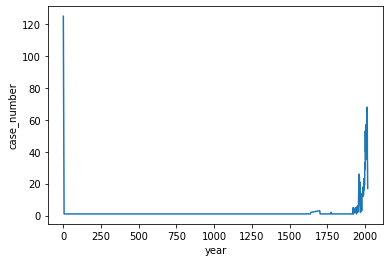

In [49]:
sns.lineplot(x='year', y='case_number', data= df_tiempo)  
;

OJO REVISAR EL AÑO 0 Y LOS AÑOS BAJOS

In [58]:
df3 = pd.read_csv('attacks_historico.csv')
df3.head(1)

,Unnamed: 0,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,6132,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,V. C. Harvey-Brain,1800.00.00-Corsair-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1800.00.00,1800.00.00,171.0,NaN,NaN


In [60]:
df3['Year'].value_counts()

0.0       125
1700.0      3
1642.0      2
1776.0      2
1637.0      1
1733.0      1
1723.0      1
1721.0      1
1703.0      1
1638.0      1
1617.0      1
1742.0      1
1595.0      1
1580.0      1
1555.0      1
1554.0      1
1543.0      1
500.0       1
77.0        1
5.0         1
1738.0      1
1800.0      1
1797.0      1
1755.0      1
1792.0      1
1791.0      1
1788.0      1
1787.0      1
1786.0      1
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1771.0      1
1767.0      1
1764.0      1
1758.0      1
1753.0      1
1751.0      1
1749.0      1
1748.0      1
Name: Year, dtype: int64